In [1]:
# Importing required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv("Iris.csv")
df.head()  # To see the first five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [3]:
df.shape # shape of data

(150, 6)

In [4]:
df.info() # Information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df = df.drop(columns=['Id']) # Dropping Id columns as it is of no use

In [6]:
df.describe() # Describing the data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum() # To check is there any null values in dataset

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.nunique() # No. of unique values in each column

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [9]:
# As it is categorical column it will be used as label,
# We can say that no. of unique value in categorical column 
# can be say as no. of clusters 

df['Species'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.corr() # Correlation within data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

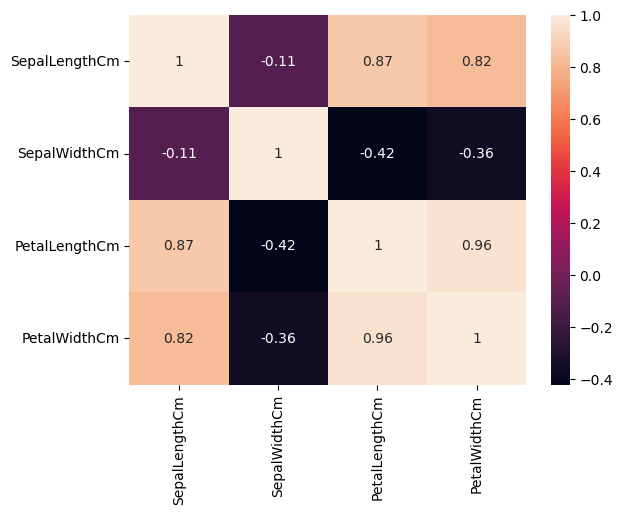

In [11]:

sns.heatmap(df.corr(),annot=True)

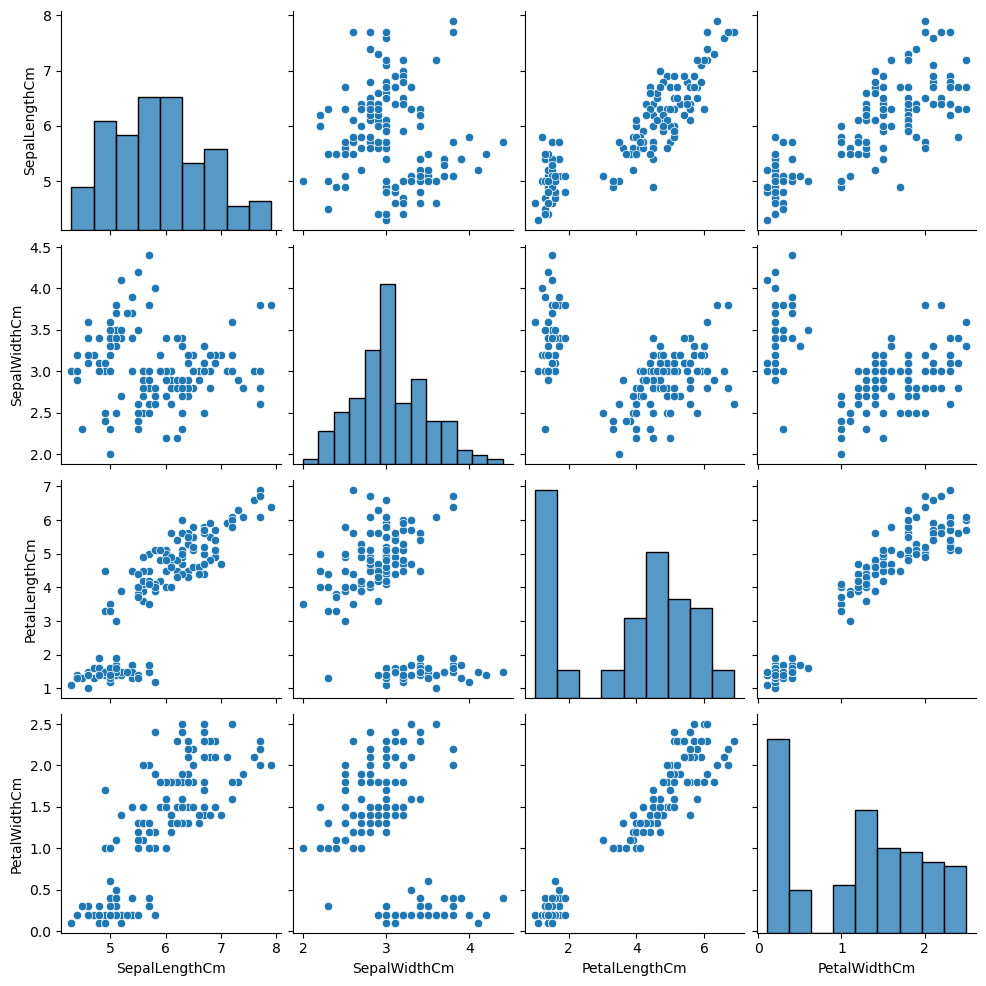

In [12]:
# Pairplot of data
sns.pairplot(df)
plt.show()

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

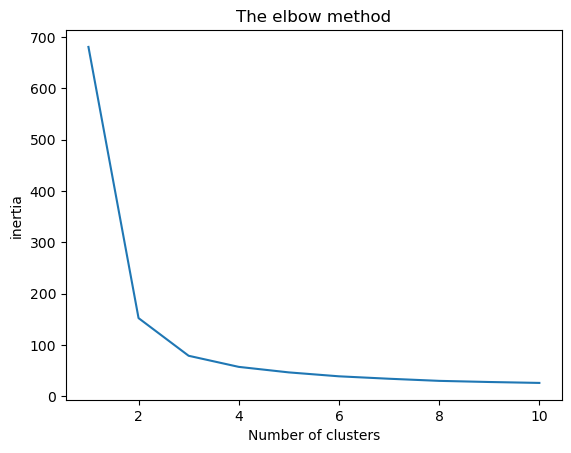

In [13]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertias)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia') # Bend Point  
plt.show()

As the line bends at 3, so n_clusters will be 3

In [14]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([8, 1, 1, 1, 8, 4, 1, 8, 1, 1, 8, 8, 1, 1, 4, 4, 4, 8, 4, 8, 8, 8,
       1, 8, 8, 1, 8, 8, 8, 1, 1, 8, 4, 4, 1, 1, 8, 1, 1, 8, 8, 1, 1, 8,
       8, 1, 8, 1, 8, 8, 3, 3, 3, 2, 3, 2, 3, 9, 3, 2, 9, 2, 2, 3, 2, 3,
       2, 2, 5, 2, 5, 2, 5, 3, 3, 3, 3, 3, 3, 9, 9, 9, 2, 5, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 9, 2, 2, 2, 3, 9, 2, 0, 5, 7, 0, 0, 7, 2, 7, 0, 6,
       0, 5, 0, 5, 5, 0, 0, 6, 7, 5, 0, 5, 7, 5, 0, 7, 5, 5, 0, 7, 7, 6,
       0, 5, 5, 7, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 5])

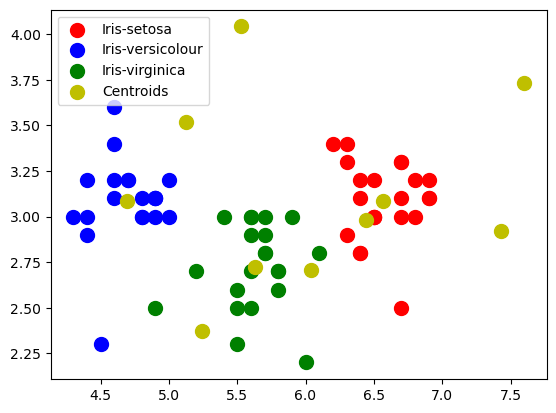

In [15]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'r', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'b', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'g', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'y', label = 'Centroids')
plt.legend()

# Conclusion

i. Successfully From the given ‘Iris’ dataset, predict the optimum   number of clusters and represent it visually

ii. The optimium clusters for Iris dataset is 3